In [2]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\30697\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
df = pd.read_csv('AAPL.csv', delimiter=',', usecols=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2008-10-14,116.26,116.40,103.14,104.08,70749800
1,2008-10-13,104.55,110.53,101.02,110.26,54967000
2,2008-10-10,85.70,100.00,85.00,96.80,79260700
3,2008-10-09,93.35,95.80,86.60,88.74,57763700
4,2008-10-08,85.91,96.33,85.68,89.79,78847900


In [6]:
df.tail()

,Date,Open,High,Low,Close,Volume
6076,1984-09-13,27.50,27.62,27.50,27.50,7429600
6077,1984-09-12,26.87,27.00,26.12,26.12,4773600
6078,1984-09-11,26.62,27.37,26.62,26.87,5444000
6079,1984-09-10,26.50,26.62,25.87,26.37,2346400
6080,1984-09-07,26.50,26.87,26.25,26.50,2981600


In [7]:
df.describe()

,Open,High,Low,Close,Volume
count,6081.000000,6081.000000,6081.000000,6081.000000,6.081000e+03
mean,46.823511,47.681506,45.913595,46.798619,1.363986e+07
std,33.993517,34.578077,33.273106,33.947235,1.352107e+07
min,12.880000,13.190000,12.720000,12.940000,8.880000e+04
25%,24.730000,25.010000,24.200000,24.690000,5.530000e+06
50%,38.250000,38.880000,37.460000,38.130000,8.976400e+06
75%,53.500000,54.550000,52.500000,53.610000,1.631920e+07
max,200.590000,202.960000,197.800000,199.830000,2.650690e+08


In [8]:
df.shape

(6081, 6)

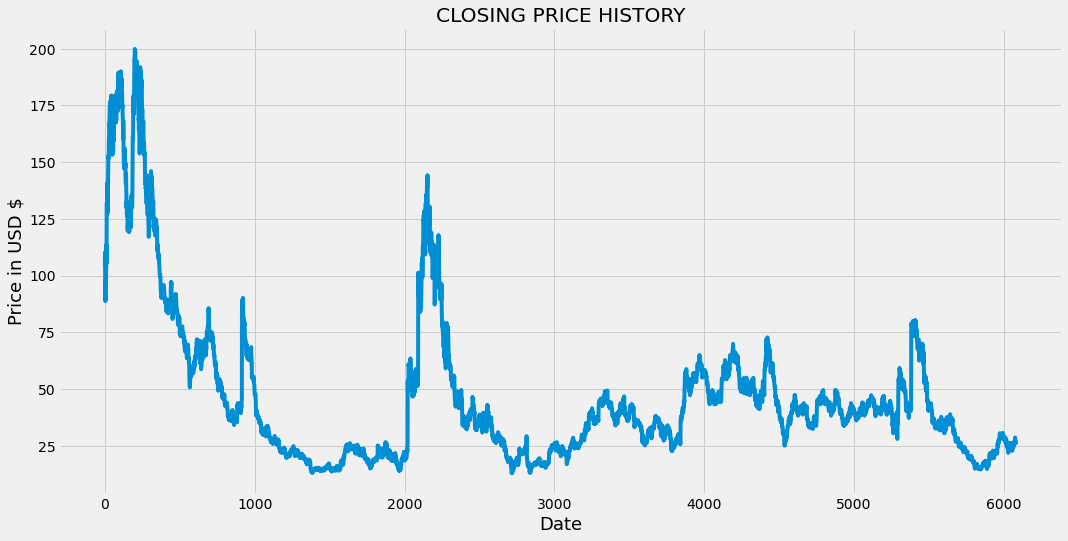

In [10]:
plt.figure(figsize=(16,8))
plt.title('CLOSING PRICE HISTORY')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price in USD $', fontsize = 18)
plt.show()



In [11]:
data = df.filter(['Close'])

dataset = data.values

training_data_len = math.ceil(len(dataset) * .8)


training_data_len 
                              

4865

In [12]:

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.48766654],
       [0.52073412],
       [0.44871315],
       ...,
       [0.07453582],
       [0.07186045],
       [0.07255605]])

In [13]:

train_data = scaled_data[0:training_data_len, : ]


x_train = []
y_train = []

for i in range(60 , len(train_data)):
  x_train.append(train_data[i-60:i, ])
  y_train.append(train_data[i, 0])


  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([[0.48766654],
       [0.52073412],
       [0.44871315],
       [0.40558617],
       [0.41120445],
       [0.40783348],
       [0.45588314],
       [0.45015785],
       [0.46637059],
       [0.51463428],
       [0.53892664],
       [0.49398042],
       [0.61694045],
       [0.63668468],
       [0.61945529],
       [0.60944941],
       [0.63197603],
       [0.68473434],
       [0.64824228],
       [0.61474664],
       [0.67922307],
       [0.68179143],
       [0.72770079],
       [0.74755204],
       [0.74198727],
       [0.74236182],
       [0.77575044],
       [0.78784312],
       [0.79340789],
       [0.82412114],
       [0.82000107],
       [0.83787255],
       [0.86039917],
       [0.86537535],
       [0.85986409],
       [0.85403178],
       [0.87671893],
       [0.86334207],
       [0.87163572],
       [0.85927551],
       [0.86922789],
       [0.87110065],
       [0.8902563 ],
       [0.89014929],
       [0.87639788],
       [0.85943603],
       [0.83797956],
       [0.80

In [14]:
x_train , y_train = np.array(x_train), np.array(y_train)

In [15]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4805, 60, 1)

In [16]:
model = Sequential()
model.add(LSTM(50, return_sequences =True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [17]:
model.compile(optimizer = 'adam', loss ='mean_squared_error')

In [27]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

4805/4805 [==============================] - 165s 34ms/step - loss: 4.4685e-04


In [28]:
test_data = scaled_data[training_data_len - 60: , : ]

x_test = []
y_test = dataset[training_data_len: , : ]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60 :  i, 0])



In [29]:

x_test = np.array(x_test)


In [30]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [48]:

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [56]:
def mae(act, pred):
    diff = pred - act
    abs_diff = np.absolute(diff)
    mean_diff = abs_diff.mean()
    return mean_diff

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100


from sklearn.metrics import mean_squared_error

loss = mean_squared_error(y_test, predictions, squared=False)

print("Loss : " + str(loss))

print("MAE : "+ str(mae(y_test,predictions)))

print("MAPE : " + str(mape(y_test,predictions)))




Loss : 2.2176958201639927
MAE : 1.6313678051296037
MAPE : 4.985731464741023
